In [ ]:
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
import graphviz

import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestRegressor

from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb


In [2]:
rd = pd.read_csv("rd_500k.csv")

In [3]:
rdc = rd[rd["DIAS_PERM"] >= 8]

In [4]:
rdc\
.groupby(by=["DIAG_PRINC"]) \
.aggregate({"DIAS_PERM" : ['count','min','mean','max','median','std','var'], "UTI_MES_TO" : ['count','min','mean','max','median','std','var']}) \
.sort_values(('DIAS_PERM', 'count'), ascending = False) \
.head(20)

DIAS_PERM                                                    \
               count min       mean  max median        std         var   
DIAG_PRINC                                                               
J189            3190   8  14.995611  156   11.0  10.284872  105.778595   
A419            2710   8  21.061993  167   16.0  15.515881  240.742556   
I64             2194   8  15.609845  113   12.0  10.416323  108.499784   
I500            1980   8  15.793434  122   12.0  10.859768  117.934570   
I509            1478   8  14.458728   87   12.0   8.780363   77.094775   
F200            1415   8  26.132155   45   30.0   7.920587   62.735705   
N390            1412   8  13.463173  114   11.0   8.489418   72.070223   
I200            1332   8  14.012763  358   11.0  12.001026  144.024630   
J159            1316   8  15.485562  105   12.0   9.714116   94.364050   
P073            1309   8  21.267380  104   18.0  12.624258  159.371879   
I219            1191   8  14.111671   81   12.0   7.618208   58.037099   
A499            1083   8  19.599261  124   15.0  14.042584  197.194158   
N189             813   8  16.280443   88   13.0   9.414122   88.625688   
J960             809   8  23.998764  150   17.0  20.855081  434.934404   
A418             771   8  20.640726   81   18.0  11.653185  135.796729   
M153             738  10  30.048780   31   31.0   2.422823    5.870073   
J449             705   8  14.473759   81   11.0   8.746571   76.502506   
A46              611   8  13.198036  102   11.0   7.180237   51.555799   
N179             590   8  16.344068  112   13.0   9.960291   99.207393   
S720             566   8  13.763251   92   11.0   8.034029   64.545621   

           UTI_MES_TO                                                    
                count min       mean  max median        std         var  
DIAG_PRINC                                                               
J189             3190   0   2.681191  153    0.0   7.141994   51.008081  
A419             2710   0   8.277122   92    4.0  11.016597  121.365405  
I64              2194   0   3.329991  102    0.0   7.536356   56.796665  
I500             1980   0   2.654040   99    0.0   6.944013   48.219312  
I509             1478   0   2.493911   60    0.0   5.823949   33.918379  
F200             1415   0   0.000000    0    0.0   0.000000    0.000000  
N390             1412   0   0.447592   59    0.0   2.951909    8.713765  
I200             1332   0   3.407658   45    2.0   4.868337   23.700708  
J159             1316   0   2.365502   37    0.0   5.886454   34.650337  
P073             1309   0   9.633308   86    6.0  11.782042  138.816504  
I219             1191   0   5.060453   79    4.0   6.088676   37.071973  
A499             1083   0   5.489381   71    0.0   9.946280   98.928492  
N189              813   0   2.220172   52    0.0   5.626905   31.662056  
J960              809   0  11.092707  118    8.0  12.957091  167.886197  
A418              771   0   8.833982   55    5.0  10.281287  105.704870  
M153              738   0   0.000000    0    0.0   0.000000    0.000000  
J449              705   0   2.211348   74    0.0   6.510209   42.382826  
A46               611   0   0.476268   31    0.0   2.637810    6.958042  
N179              590   0   4.754237   40    0.0   7.683396   59.034575  
S720              566   0   1.946996   29    0.0   3.760627   14.142318

In [5]:
x = rdc.loc[:,["DIAG_PRINC","SEXO","IND_VDRL","IDADE","CAR_INT","NUM_FILHOS","PROC_SOLIC",
                    "INSTRU","CNAER","RACA_COR","ETNIA","DIAGSEC1","DIAGSEC2","DIAGSEC3","DIAGSEC4","DIAGSEC5","DIAGSEC6","DIAGSEC7"]]
y = rdc["DIAS_PERM"]

In [6]:
x["DIAGSEC1"] = x["DIAGSEC1"].fillna(0)
x["DIAGSEC2"] = x["DIAGSEC2"].fillna(0)
x["DIAGSEC3"] = x["DIAGSEC3"].fillna(0)
x["DIAGSEC4"] = x["DIAGSEC4"].fillna(0)
x["DIAGSEC5"] = x["DIAGSEC5"].fillna(0)
x["DIAGSEC6"] = x["DIAGSEC6"].fillna(0)

In [7]:
x["DIAGSEC1"] = x["DIAGSEC1"].apply(lambda x : x if x == 0 else 1)
x["DIAGSEC2"] = x["DIAGSEC2"].apply(lambda x : x if x == 0 else 1)
x["DIAGSEC3"] = x["DIAGSEC3"].apply(lambda x : x if x == 0 else 1)
x["DIAGSEC4"] = x["DIAGSEC4"].apply(lambda x : x if x == 0 else 1)
x["DIAGSEC5"] = x["DIAGSEC5"].apply(lambda x : x if x == 0 else 1)
x["DIAGSEC6"] = x["DIAGSEC6"].apply(lambda x : x if x == 0 else 1)
x["DIAG_GRUPO"] = x["DIAG_PRINC"].apply( lambda x :  x[0])
x["PROC_SOLIC"] = x["PROC_SOLIC"].apply( lambda x :  str(x)[:2])

In [8]:
x["DIAGSEC"] =  x["DIAGSEC1"] + x["DIAGSEC2"] + x["DIAGSEC3"] + x["DIAGSEC4"] + x["DIAGSEC5"] + x["DIAGSEC6"]

In [9]:
x = x.drop(["DIAGSEC1","DIAGSEC2","DIAGSEC3","DIAGSEC4","DIAGSEC5","DIAGSEC6","DIAGSEC7","DIAG_PRINC"],axis='columns')

In [10]:
categorical_mask=["SEXO","IND_VDRL","CAR_INT","DIAG_GRUPO","PROC_SOLIC",\
                    "INSTRU","CNAER","RACA_COR","ETNIA","DIAGSEC"]
#ohe = OneHotEncoder(categorical_features=categorical_mask, sparse=False)
#i200x = ohe.fit_transform(i200x)
x = pd.get_dummies(x,columns=categorical_mask)

In [11]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.30, random_state=42)
dt = DecisionTreeRegressor(criterion='mse',max_depth=5)
dt.fit(xtrain, ytrain)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

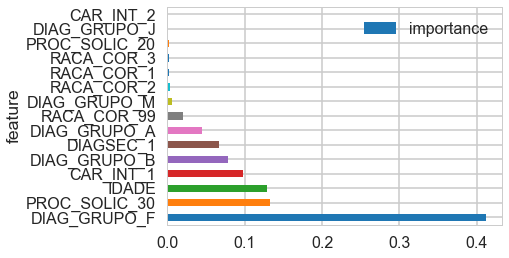

In [13]:
imps = pd.DataFrame({'importance': dt.feature_importances_, 'feature': x.columns}).sort_values('importance', ascending = False)[:15]
imps.plot(x='feature', y='importance', kind='barh')
plt.figure(figsize=(20,10))
plt.show()

In [14]:
pred = dt.predict(xtest)
metrics.mean_squared_error(pred,ytest)

109.51612470154612

In [15]:
rf = RandomForestRegressor(n_estimators=100, max_features=7, max_depth=20, min_samples_split=500)
rf.fit(xtrain, ytrain)
predrf = rf.predict(xtest)
print( "MSE:  ", metrics.mean_squared_error(predrf,ytest))
print( "MAE:  ", metrics.mean_absolute_error(predrf,ytest))
print( "R2:  ", metrics.r2_score(predrf,ytest))

MSE:   107.93413439386494
MAE:   7.058341218088745
R2:   -8.060995045198688


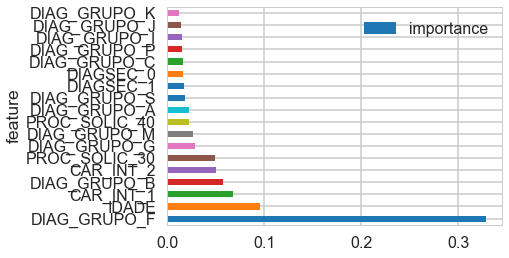

In [17]:
imps = pd.DataFrame({'importance': rf.feature_importances_, 'feature': x.columns}).sort_values('importance', ascending = False)[:18]
imps.plot(x='feature', y='importance', kind='barh')
plt.figure(figsize=(20,10))
plt.show()

In [18]:
# Create the parameter grid: gbm_param_grid
gbm_param_grid = {
    'n_estimators': [25],
    'max_depth': range(2, 12)
}

# Instantiate the regressor: gbm
gbm = xgb.XGBRegressor(n_estimators=10)

# Perform random search: grid_mse
randomized_mse = RandomizedSearchCV(param_distributions=gbm_param_grid, estimator=gbm, scoring="neg_mean_squared_error", n_iter=5, cv=4, verbose=1)


# Fit randomized_mse to the data
randomized_mse.fit(xtrain,ytrain)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", randomized_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(randomized_mse.best_score_)))

Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   33.6s finished


Best parameters found:  {'n_estimators': 25, 'max_depth': 7}
Lowest RMSE found:  10.661859912923644


In [19]:
gbm = xgb.XGBRegressor(n_estimators=25, max_depth=4)
gbm.fit(xtrain,ytrain)
predxgb = gbm.predict(xtest)
print( "MSE:  ", metrics.mean_squared_error(predxgb,ytest))
print( "MAE:  ", metrics.mean_absolute_error(predxgb,ytest))
print( "R2:  ", metrics.r2_score(predxgb,ytest))

MSE:   110.36623373523337
MAE:   6.86990074091871
R2:   -10.353003916264985


In [20]:
gbm.score(xtest,ytest)

0.10422060540182354

In [1]:
xgb.plot_tree(gbm, num_trees=2)
fig = plt.gcf()
fig.set_size_inches(200, 100)
fig.savefig('foo.png')


NameError: name 'xgb' is not defined

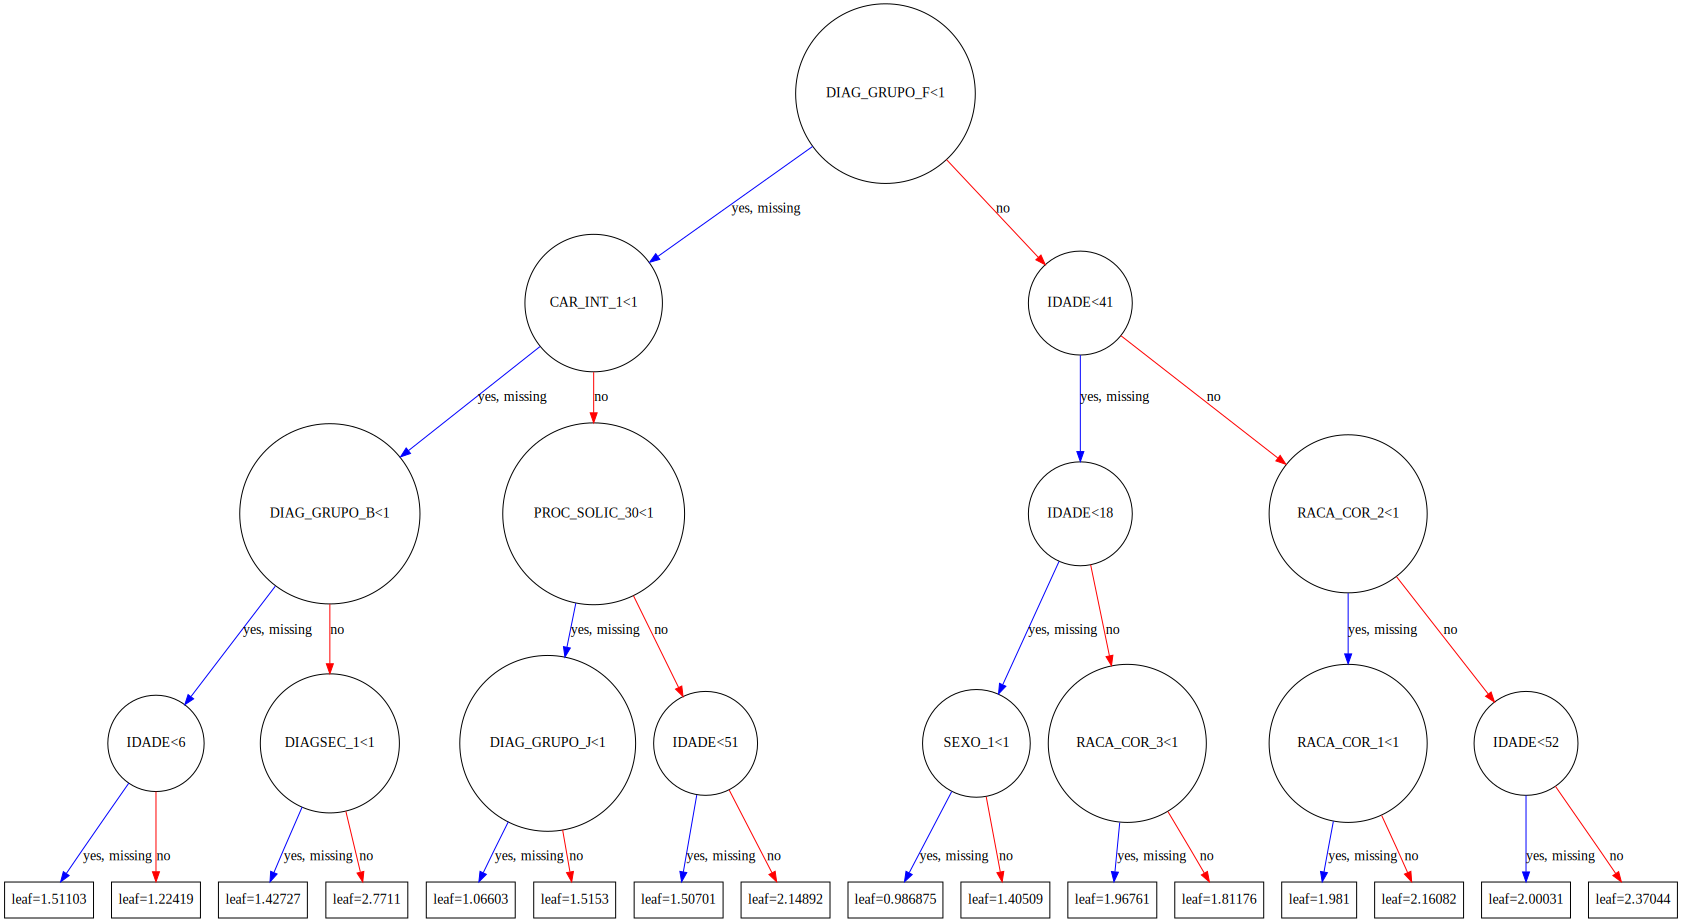

In [22]:
xgb.to_graphviz(gbm, num_trees=2)

In [23]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(x)
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

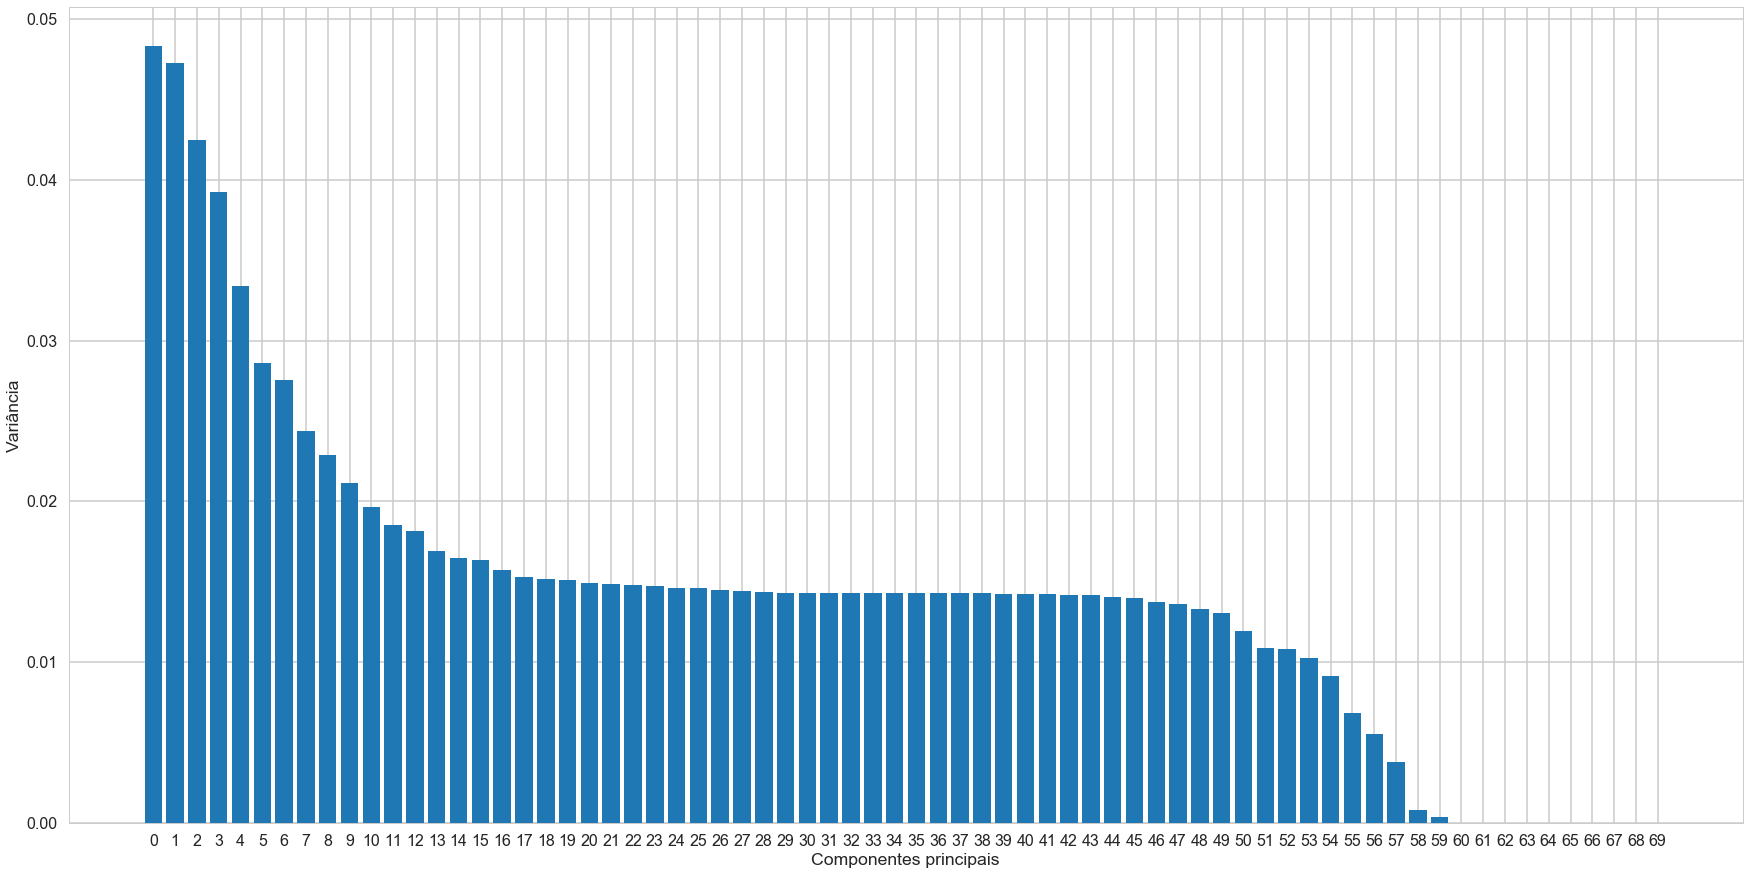

Variância explicada: 
--------------------------------------------------
1 Componente(s) principal(is): 4.83%
2 Componente(s) principal(is): 9.56%
3 Componente(s) principal(is): 13.81%
4 Componente(s) principal(is): 17.74%
5 Componente(s) principal(is): 21.08%
6 Componente(s) principal(is): 23.94%
7 Componente(s) principal(is): 26.69%
8 Componente(s) principal(is): 29.13%
9 Componente(s) principal(is): 31.42%
10 Componente(s) principal(is): 33.53%
11 Componente(s) principal(is): 35.49%
12 Componente(s) principal(is): 37.34%
13 Componente(s) principal(is): 39.16%
14 Componente(s) principal(is): 40.85%
15 Componente(s) principal(is): 42.50%
16 Componente(s) principal(is): 44.13%
17 Componente(s) principal(is): 45.70%
18 Componente(s) principal(is): 47.23%
19 Componente(s) principal(is): 48.75%
20 Componente(s) principal(is): 50.26%
21 Componente(s) principal(is): 51.75%
22 Componente(s) principal(is): 53.23%
23 Componente(s) principal(is): 54.71%
24 Componente(s) principal(is): 56.19%
25

In [24]:
plt.figure(figsize=(30,15))
features = range(pca.n_components_)

plt.bar(features, pca.explained_variance_ratio_)
plt.xticks(features)
plt.xlabel('Componentes principais')
plt.ylabel('Variância')
plt.show()

print('Variância explicada: ')
cum_exp_var = np.cumsum(pca.explained_variance_ratio_)

print('-'*50)
for i in range(len(pca.explained_variance_ratio_)):
    print('{} Componente(s) principal(is): {:.2%}'.format(i+1, cum_exp_var[i]))